In [ ]:
import numpy as np
import lib.io.stan
import lib.plots.stan
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors,cm
from matplotlib.lines import Line2D
import random
import scipy.signal as signal

In [ ]:
res_root_dir = '/home/anirudh/hdisk/Academia/papers/VEP_infer'

# Patient CJ

In [ ]:
cj_ntwrk = np.load('datasets/id002_cj/CJ_network.npz')
cj_sim_data = np.load('datasets/id002_cj/CJ_syn_tvb_ez=6-34_pz=27-5-11.npz')

#### Structural Connectivity

In [ ]:
plt.figure(figsize=(10,10))
num_nodes = cj_ntwrk['SC'].shape[0]
log_norm = colors.LogNorm(vmin=1e-7, vmax=cj_ntwrk['SC'].max())
plt.imshow(cj_ntwrk['SC'], norm=log_norm, cmap=cm.hot)
xticks = np.append(np.array([0]),np.r_[9:num_nodes:10])
yticks = np.append(np.array([0]),np.r_[9:num_nodes:10])
plt.xticks(xticks, xticks+1, fontsize=15)
plt.yticks(yticks, yticks+1, fontsize=15)
plt.xlabel('Node',fontsize=20)
plt.ylabel('Node',fontsize=20)
cb = plt.colorbar(fraction=0.035)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(),fontsize=15);
plt.savefig(f'{res_root_dir}/figures/CJ/SC.png')


#### Gain Matrix

In [ ]:
plt.figure(figsize=(6,10))
num_sensors, num_nodes = cj_ntwrk['gain_mat'].shape
log_norm = colors.LogNorm(vmin=cj_ntwrk['gain_mat'].min(), vmax=cj_ntwrk['gain_mat'].max())
plt.imshow(cj_ntwrk['gain_mat'], norm=log_norm, cmap=cm.hot)
xticks = np.append(np.array([0]),np.r_[9:num_nodes:10])
yticks = np.append(np.array([0]),np.r_[9:num_sensors:10])
plt.xticks(xticks, xticks+1, fontsize=15)
plt.yticks(yticks, yticks+1, fontsize=15)
plt.xlabel('Node',fontsize=20)
plt.ylabel('Sensor',fontsize=20)
cb = plt.colorbar(fraction=0.045)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(),fontsize=15);
plt.savefig(f'{res_root_dir}/figures/CJ/Gain_matrix.png')

In [ ]:
print(cj_sim_data.keys())
print(cj_sim_data['src_sig'].shape)

#### Simulated Source activity

In [ ]:
import numpy as np
import lib.io.stan
import lib.plots.stan
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors,cm
from matplotlib.lines import Line2D
import random
import scipy.signal as signal

In [ ]:
# res_root_dir = '/home/anirudh/hdisk/Academia/papers/VEP_infer'
ez = cj_sim_data['ez']
pz = np.concatenate((cj_sim_data['pz_x0'], cj_sim_data['pz_kplng']))
start_idx = 2500
end_idx = 3800
src_sig = cj_sim_data['src_sig'][start_idx:end_idx,0,:,0] + cj_sim_data['src_sig'][start_idx:end_idx,3,:,0]
n_areas = src_sig.shape[1]

fig = plt.figure(figsize=(25,5))

ax = plt.subplot()
yticks = []
yticks_labels = []
for i in range(n_areas):
    if(i in ez):
        t = src_sig[:,i]+7*(np.where(ez == i)[0] + 1)
        plt.plot(t, alpha=0.5, color='xkcd:red');
        yticks.append(t.mean(axis=0))
        yticks_labels.append(f'Node {i+1}(EZ)')
    elif(i in pz):
        t = src_sig[:,i]+7*(np.where(pz == i)[0] + 3)
        plt.plot(t, alpha=0.5, color='xkcd:rust');
        yticks.append(t.mean(axis=0))
        yticks_labels.append(f'Node {i+1}(PZ)')
    else:
        plt.plot(src_sig[:,i]+5, alpha=0.5, color='black');
#         yticks.append(src_sig[:,i].mean(axis=0) +5)
plt.xlabel('Time', fontsize=20)
plt.ylabel(r'Source Activity', fontsize=20);
# plt.xticks(ax.get_xticks()[1:-1], map(lambda x: str(int(x)), ax.get_xticks()[1:-1]), fontsize=15);
# ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(yticks,yticks_labels);
# legend_elements = [Line2D([0], [0], color='xkcd:red', alpha=0.5, linewidth=4, label='EZ'),
#                    Line2D([0], [0], color='xkcd:rust', alpha=0.5, linewidth=4, label='PZ'),
#                    Line2D([0], [0], color='black', alpha=0.5, linewidth=4, label='Non-seizing'),]
# plt.legend(handles=legend_elements)
# plt.savefig(f'{res_root_dir}/figures/CJ/source_activity.png')



#### Simulated SEEG

In [ ]:
random.seed(100)
fig = plt.figure(figsize=(25,5))
ax = plt.subplot()
start_idx = 2500
end_idx = 3800
seeg_raw = cj_sim_data['seeg'][:,start_idx:end_idx]
chnl_names = []
with open('datasets/id002_cj/seeg.xyz') as fd:
    for line in fd.readlines():
        chnl_names.append(line.strip().split()[0])
rndm_chsn_chnls = random.sample(range(0,seeg.shape[0]),5)
seeg_raw = seeg_raw[rndm_chsn_chnls, :]
nyq = 1000 / 2.0
# High pass filter the data
b, a = signal.butter(5, 10.0 / nyq, 'high')
seeg_hpfilt = signal.filtfilt(b, a, seeg_raw)
t = seeg_hpfilt.T + 60*np.r_[0:len(rndm_chsn_chnls)]
yticks = t.mean(axis=0)
yticks_labels = [chnl_names[idx] for idx in rndm_chsn_chnls]
plt.plot(t, color='black');
plt.xlabel('Time', fontsize=20)
plt.ylabel('SEEG', fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(yticks, yticks_labels, fontsize=12);
plt.xticks(fontsize=12);
plt.savefig(f'{res_root_dir}/figures/CJ/seeg.png')

#### Sensors

In [ ]:
import tvbpipeline.util.plot
import numpy as np
import os
import importlib

In [ ]:
res_root_dir = 'results/tmp'
cj_sim_data = np.load('datasets/syn_data/id002_cj/CJ_syn_tvb_ez=6-34_pz=27-5-11.npz')
ez = cj_sim_data['ez']
pz = np.concatenate((cj_sim_data['pz_x0'], cj_sim_data['pz_kplng']))
tvbpipeline.util.plot.seeg_elecs('datasets/syn_data/id002_cj/connectivity.zip', 'datasets/syn_data/id002_cj/seeg.xyz', ez, pz, f'{res_root_dir}/figures/electrodes.png')

#### Onsets

In [ ]:
import numpy as np
import lib.io.stan
import lib.plots.stan
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors,cm
from matplotlib.lines import Line2D
import random
import scipy.signal as signal

In [ ]:
res_root_dir = '/home/anirudh/hdisk/Academia/papers/VEP_infer'
sim_data = np.load('datasets/syn_data/id002_cj/CJ_syn_tvb_ez=6-34_pz=27-5-11.npz')
start_idx = 2500
end_idx = 3800
sim_src_sig = sim_data['src_sig'][start_idx:end_idx,0,:,0] + sim_data['src_sig'][start_idx:end_idx,3,:,0]
ds_freq = 10
sim_src_sig_ds = sim_src_sig[0:-1:ds_freq,:]
optima = lib.io.stan.read_samples(['results/exp10/exp10.57.20/samples_syn_cj_optim_chain1.csv'])
fit_src_sig = optima['x'][0]

In [ ]:
onsets = sim_src_sig_ds.shape[0]*np.zeros(sim_src_sig_ds.shape[1])
for i, sig in enumerate(sim_src_sig_ds.T):
    sig_cond = sig > -1
    if sig_cond.any():
        onsets[i] = np.min(np.nonzero(sig_cond))

In [ ]:
plt.figure(figsize=(5,5))
# plt.bar(np.r_[1:onsets.shape[0]+1], onsets)
# plt.xticks(np.r_[1:onsets.shape[0]+1:2]);
plt.hist(onsets[np.nonzero(onsets > 0)]);

In [ ]:
onsets = np.zeros(fit_src_sig.shape[1])
for i, sig in enumerate(fit_src_sig.T):
    sig_cond = sig > 0
    if sig_cond.any():
        onsets[i] = np.min(np.nonzero(sig_cond))

# Patient BT

In [ ]:
import numpy as np
import lib.io.stan
import lib.io.tvb
import lib.io.seeg
import lib.plots.stan
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors,cm
from matplotlib.lines import Line2D
import random
import scipy.signal as signal
import os

In [ ]:
ntwrk = np.load('datasets/syn_data/id001_bt/network.npz')
sim_data = np.load('datasets/syn_data/id001_bt/syn_tvb_ez=48-79_pz=11-17-22-75.npz')
figs_dir = '/home/anirudh/hdisk/Academia/papers/VEP_infer/figures/BT'
os.makedirs(figs_dir, exist_ok=True)

### Structural Connectivity

In [ ]:
plt.figure(figsize=(10,10))
SC = ntwrk['SC']
num_nodes = SC.shape[0]
SC[SC<1e-10] = 1e-10
log_norm = colors.LogNorm(vmin=1e-10, vmax=SC.max(), clip=True)
plt.imshow(SC, norm=log_norm, cmap=cm.hot)
xticks = np.append(np.array([0]),np.r_[9:num_nodes:10])
yticks = np.append(np.array([0]),np.r_[9:num_nodes:10])
plt.xticks(xticks, xticks+1, fontsize=15, rotation='vertical')
plt.yticks(yticks, yticks+1, fontsize=15)
plt.xlabel('Node',fontsize=20)
plt.ylabel('Node',fontsize=20)
cb = plt.colorbar(fraction=0.035)
# cb.ax.set_yticklabels(cb.ax.get_yticklabels(),fontsize=15);
plt.savefig(os.path.join(figs_dir, 'SC.png'))

### Gain Matrix

In [ ]:
plt.figure(figsize=(10,10))
gain_mat = ntwrk['gain_mat']
num_sensors, num_nodes = gain_mat.shape
log_norm = colors.LogNorm(vmin=gain_mat.min(), vmax=gain_mat.max())
plt.imshow(gain_mat, norm=log_norm, cmap=cm.hot)
xticks = np.append(np.array([0]),np.r_[9:num_nodes:10])
yticks = np.append(np.array([0]),np.r_[9:num_sensors:10])
plt.xticks(xticks, xticks+1, fontsize=15, rotation='vertical')
plt.yticks(yticks, yticks+1, fontsize=15)
plt.xlabel('Node',fontsize=20)
plt.ylabel('Sensor',fontsize=20)
cb = plt.colorbar(fraction=0.035)
# cb.ax.set_yticklabels(cb.ax.get_yticklabels(),fontsize=15);
plt.savefig(os.path.join(figs_dir, 'Gain_matrix.png'))

### Sensors

In [ ]:
import tvbpipeline.util.plot
import numpy as np
import os
import importlib

In [ ]:
importlib.reload(tvbpipeline.util.plot)
figs_dir = '/home/anirudh/hdisk/Academia/papers/VEP_infer/figures/BT'
sim_data = np.load('datasets/syn_data/id001_bt/syn_tvb_ez=48-79_pz=11-17-22-75.npz')
ez = sim_data['ez']
pz = sim_data['pz']
tvbpipeline.util.plot.seeg_elecs('datasets/syn_data/id001_bt/connectivity.destrieux.zip',
                                 'datasets/syn_data/id001_bt/seeg.xyz', ez, pz,
                                 os.path.join(figs_dir, 'electrodes_correct_implantation.png'))

### Simulated Source activity

In [ ]:
_, roi_names = lib.io.tvb.read_roi_cntrs('datasets/syn_data/id001_bt/connectivity.destrieux.zip')
ez = sim_data['ez']
pz = sim_data['pz']
start_idx = 800
end_idx = 2300
x = sim_data['src_sig'][start_idx:end_idx,0,:,0] + sim_data['src_sig'][start_idx:end_idx,3,:,0]
z = sim_data['src_sig'][start_idx:end_idx,2,:,0]
n_areas = x.shape[1]
fig = plt.figure(figsize=(25,5))

ax = plt.subplot()
yticks = []
yticks_labels = []
for i in range(n_areas):
    if(i in ez):
        t = x[:,i]+7*(np.where(ez == i)[0] + 1)
        plt.plot(t, alpha=0.5, color='xkcd:red');
        yticks.append(t.mean(axis=0))
        yticks_labels.append(roi_names[i])
    elif(i in pz):
        t = x[:,i]+7*(np.where(pz == i)[0] + 3)
        plt.plot(t, alpha=0.5, color='xkcd:rust');
        yticks.append(t.mean(axis=0))
        yticks_labels.append(roi_names[i])
    else:
        plt.plot(x[:,i]+5, alpha=0.5, color='black');
#         yticks.append(src_sig[:,i].mean(axis=0) +5)
plt.xlabel('Time', fontsize=20)
# plt.ylabel(r'Source Activity', fontsize=20);
# plt.xticks(ax.get_xticks()[1:-1], map(lambda x: str(int(x)), ax.get_xticks()[1:-1]), fontsize=15);
# ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(yticks,yticks_labels, fontsize=15);
legend_elements = [Line2D([0], [0], color='xkcd:red', alpha=0.5, linewidth=4, label='EZ'),
                   Line2D([0], [0], color='xkcd:rust', alpha=0.5, linewidth=4, label='PZ'),
                   Line2D([0], [0], color='black', alpha=0.8, linewidth=4, label='Non-seizing'),]
plt.legend(handles=legend_elements, fontsize=15, loc='upper right')
plt.title('Simulated Data: Source Activity', fontsize=25)
plt.savefig(os.path.join(figs_dir, 'source_activity.png'))

### Simulated SEEG

In [ ]:
np.random.seed(34534)#35087873
fig = plt.figure(figsize=(25,5))
ax = plt.subplot()
start_idx = 800
end_idx = 2300
seeg_raw = sim_data['seeg'][:,start_idx:end_idx]
chnl_names = []
with open('datasets/syn_data/id001_bt/seeg.xyz') as fd:
    for line in fd.readlines():
        chnl_names.append(line.strip().split()[0])
rndm_chsn_chnls = np.random.sample(range(0,seeg_raw.shape[0]),5)
seeg_raw = seeg_raw[rndm_chsn_chnls, :]
nyq = 1000 / 2.0
# High pass filter the data
b, a = signal.butter(5, 10.0 / nyq, 'high')
seeg_hpfilt = signal.filtfilt(b, a, seeg_raw)
t = seeg_hpfilt.T + 25*np.r_[0:len(rndm_chsn_chnls)]
yticks = t.mean(axis=0)
yticks_labels = [chnl_names[idx] for idx in rndm_chsn_chnls]
plt.plot(t, color='black');
plt.xlabel('Time', fontsize=20)
plt.ylabel('SEEG', fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(yticks, yticks_labels, fontsize=12);
plt.xticks(fontsize=12);
plt.savefig(os.path.join(figs_dir, 'seeg.png'))

### Modelled Data Features

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import lib.io.stan
import lib.io.seeg

In [2]:
np.random.seed(34534)
figs_dir = '/home/anirudh/Academia/papers/vep_infer/figures/BT'
fit_data = lib.io.stan.rload('results/exp10/exp10.69/Rfiles/fit_data_snsrfit_ode_syn_optim.R')
obs_slp = fit_data['slp']
obs_snsr_pwr = fit_data['snsr_pwr']
rndm_chsn_chnls = np.random.randint(0, obs_slp.shape[1],10)

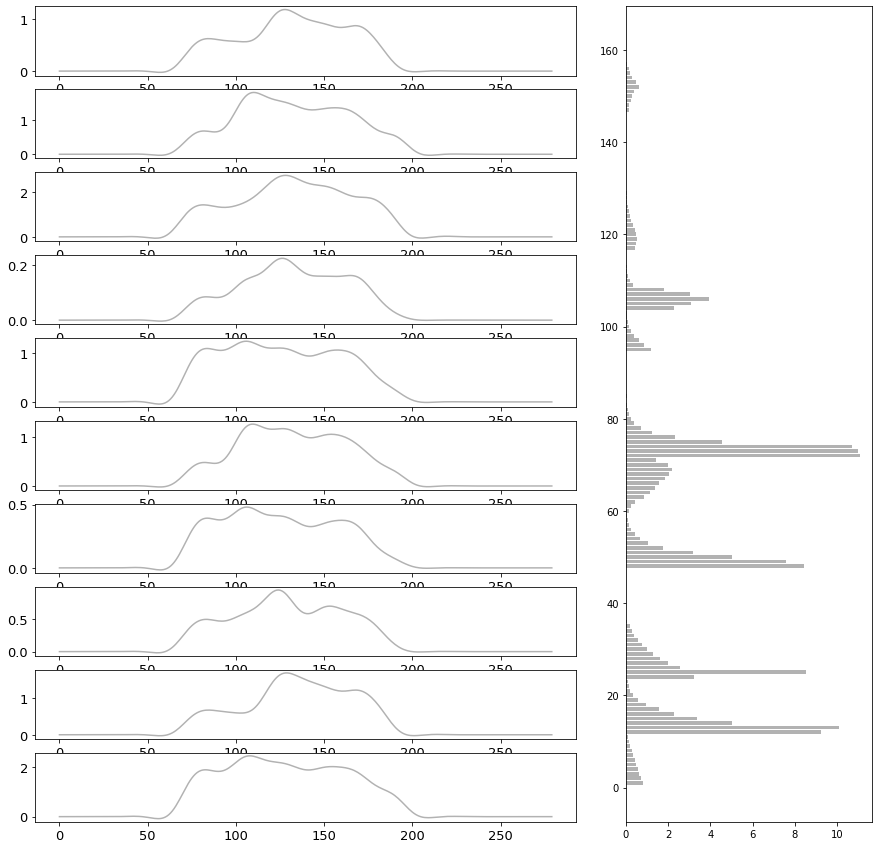

In [3]:
fig = plt.figure(figsize=(15,15))
gs = fig.add_gridspec(rndm_chsn_chnls.shape[0], 3)
for i, chnl in enumerate(rndm_chsn_chnls):
    ax = fig.add_subplot(gs[i, :-1])
    ax.plot(obs_slp[:, chnl], color='black', alpha=0.3);
    ax.tick_params('x', labelsize=13)
    ax.tick_params('y', labelsize=13)
ax = fig.add_subplot(gs[:, 2])
ax.barh(np.r_[1:obs_snsr_pwr.shape[0]+1], obs_snsr_pwr, color='black', alpha=0.3)
fig.savefig(os.path.join(figs_dir,'modelled_data_features.png'))

### Phase space

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import lib.io.stan

In [ ]:
figs_dir = '/home/anirudh/hdisk/Academia/papers/VEP_infer/figures/BT'
_, roi_names = lib.io.tvb.read_roi_cntrs('datasets/syn_data/id001_bt/connectivity.destrieux.zip')
sim_data = np.load('datasets/syn_data/id001_bt/syn_tvb_ez=48-79_pz=11-17-22-75.npz')
start_idx = 800
end_idx = 2200
sim_x = sim_data['src_sig'][start_idx:end_idx,0,:,0] + sim_data['src_sig'][start_idx:end_idx,3,:,0]
sim_z = sim_data['src_sig'][start_idx:end_idx,2,:,0]
map_est = lib.io.stan.read_samples(['results/exp10/exp10.69/samples_syn_optim_chain1.csv'])
map_x = map_est['x'][0]
map_z = map_est['z'][0]
ez = sim_data['ez']
pz = sim_data['pz']
n_roi = sim_x.shape[1]
hz = np.setdiff1d(np.arange(0, n_roi), np.concatenate((ez,pz)))

In [ ]:
fig = plt.figure(figsize=(5,25))
gs = fig.add_gridspec(ez.shape[0], 2)
for i, roi in enumerate(ez):
    plt.subplot(ez.shape[0], 2, i+1)
    plt.plot(sim_x[0:-1:5, roi], sim_z[0:-1:5, roi], color='black', alpha=0.3);
    plt.plot(map_x[:, roi], map_z[:, roi], color='xkcd:red' if roi in ez else 'xkcd:rust')
#     plt.xlim(-3.2, 2)
#     plt.ylim(2, 5)
    plt.title(roi_names[roi], fontsize=15)
plt.subplot(7, 1, 7)
plt.plot(sim_x[0:-1:5, hz], sim_z[0:-1:5, hz], color='black', alpha=0.3);
plt.plot(map_x[:, hz], map_z[:, hz], color='xkcd:blue')
# plt.xlim(-3.2, 2)
# plt.ylim(2.0, 5)
plt.title('Healthy Nodes', fontsize=15)
plt.tight_layout()
plt.savefig(os.path.join(figs_dir, 'predicted_source_crct_implnt_phasespace.svg'))

In [ ]:
fig = plt.figure(figsize=(15,25))
gs = fig.add_gridspec(7,1)
for i, roi in enumerate(np.concatenate((ez, pz))):
    fig.add_subplot(gs[i, 0])
    plt.plot(sim_x[0:-1:5, roi], 'black', alpha=0.3);
    plt.plot(map_x[:, roi], color='xkcd:red' if roi in ez else 'xkcd:rust');
    plt.ylim(-3, 1.5)
    plt.title(roi_names[roi], fontsize=15)
    
fig.add_subplot(gs[6,0])
plt.plot(sim_x[0:-1:5, hz], 'black', alpha=1.0);
plt.plot(map_x[:, hz], color='xkcd:blue', alpha=0.3);
plt.title('Healthy Nodes', fontsize=15)
plt.ylim(-3.2, 1.5)
plt.tight_layout()
plt.savefig(os.path.join(figs_dir, 'predicted_source_ctct_implnt_x.svg'))

### Onsets

In [ ]:
import numpy as np
import lib.io.stan
import lib.plots.stan
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors,cm
from matplotlib.lines import Line2D
import random
import scipy.signal as signal

In [ ]:
figs_dir = '/home/anirudh/hdisk/Academia/papers/VEP_infer/figures/BT'
sim_data = np.load('datasets/syn_data/id001_bt/syn_tvb_ez=48-79_pz=11-17-22-75.npz')
start_idx = 800
end_idx = 2200
sim_src_sig = sim_data['src_sig'][start_idx:end_idx,0,:,0] + sim_data['src_sig'][start_idx:end_idx,3,:,0]
ds_freq = 5
sim_src_sig_ds = sim_src_sig[0:-1:ds_freq,:]
map_est = lib.io.stan.read_samples(['results/exp10/exp10.69/samples_syn_optim_chain1.csv'])
map_src_sig = map_est['x'][0]

In [ ]:
sim_onsets = sim_src_sig_ds.shape[0]*np.zeros(sim_src_sig_ds.shape[1])
for i, sig in enumerate(sim_src_sig_ds.T):
    sig_cond = sig > 0
    if sig_cond.any():
        sim_onsets[i] = np.min(np.nonzero(sig_cond))

map_onsets = np.zeros(map_src_sig.shape[1])
for i, sig in enumerate(map_src_sig.T):
    sig_cond = sig > 0
    if sig_cond.any():
        map_onsets[i] = np.min(np.nonzero(sig_cond))

In [ ]:
plt.figure(figsize=(8,5))
# plt.bar(np.r_[1:onsets.shape[0]+1], onsets)
# plt.xticks(np.r_[1:onsets.shape[0]+1:2]);
plt.hist([sim_onsets[np.nonzero(sim_onsets > 0)],
         map_onsets[np.nonzero(map_onsets > 0)]],
         color=['black', 'green'], alpha=0.5,
         label=['Ground Truth', 'Inferred']);
plt.xlabel('Time', fontsize=15);
plt.xticks(fontsize=15)
plt.yticks(ticks=[0,1,2], labels=[0,1,2], fontsize=15)
plt.legend()
plt.savefig(os.path.join(figs_dir, 'onsets_crct_implnt.svg'))

### Fit to observations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import lib.io.stan
import lib.io.seeg

In [ ]:
np.random.seed(34534)
figs_dir = '/home/anirudh/Academia/papers/vep_infer/figures/BT'
fit_data = lib.io.stan.rload('results/exp10/exp10.69/Rfiles/fit_data_snsrfit_ode_syn_optim.R')
obs_slp = fit_data['slp']
obs_snsr_pwr = fit_data['snsr_pwr']
csv_path = 'results/exp10/exp10.69/samples_syn_optim_chain1.csv'
map_est = lib.io.stan.read_samples([csv_path])
map_slp = map_est['mu_slp'][0]
map_snsr_pwr = map_est['mu_snsr_pwr'][0]
rndm_chsn_chnls = np.random.randint(0, obs_slp.shape[1],10)

In [ ]:
fig = plt.figure(figsize=(15,15))
gs = fig.add_gridspec(rndm_chsn_chnls.shape[0], 3)
for i, chnl in enumerate(rndm_chsn_chnls):
    ax = fig.add_subplot(gs[i, :-1])
    ax.plot(obs_slp[:, chnl], color='black', alpha=0.3);
    ax.plot(map_slp[:, chnl], color='red', alpha=0.3);
    ax.tick_params('x', labelsize=13)
    ax.tick_params('y', labelsize=13)
ax = fig.add_subplot(gs[:, 2])
ax.barh(np.r_[1:obs_snsr_pwr.shape[0]+1], obs_snsr_pwr, color='black', alpha=0.3)
ax.barh(np.r_[1:map_snsr_pwr.shape[0]+1], map_snsr_pwr, color='red', alpha=0.3)
# plt.savefig(os.path.join(figs_dir,'fit_to_observation.png'))
fig.savefig(os.path.join(figs_dir,'fit_to_observation.png'))

### Wrong priors

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import lib.io.stan
import lib.io.tvb
import os
import retro_results

In [ ]:
figs_dir = '/home/anirudh/Academia/papers/vep_infer/figures/BT'
roi_cntrs, roi_names = lib.io.tvb.read_roi_cntrs('datasets/syn_data/id001_bt/connectivity.destrieux.zip')
sim_data = np.load('datasets/syn_data/id001_bt/syn_tvb_ez=48-79_pz=11-17-22-75.npz')
start_idx = 800
end_idx = 2200
sim_x = sim_data['src_sig'][start_idx:end_idx,0,:,0] + sim_data['src_sig'][start_idx:end_idx,3,:,0]
sim_z = sim_data['src_sig'][start_idx:end_idx,2,:,0]
csv_path = 'results/exp10/exp10.72/samples_syn_optim_chain1.csv'
map_est = lib.io.stan.read_samples([csv_path])
map_x = map_est['x'][0]
map_z = map_est['z'][0]
ez_gt = sim_data['ez'] # EZ ground truth
pz_gt = sim_data['pz'] # PZ ground truth
n_roi = sim_x.shape[1]
hz_gt = np.setdiff1d(np.arange(0, n_roi), np.concatenate((ez_gt,pz_gt)))
fit_data = lib.io.stan.rload('results/exp10/exp10.72/Rfiles/fit_data_snsrfit_ode_syn_optim.R')
ez_prior = np.nonzero(fit_data['x0_mu'] == -1.8)[0]
pz_prior = np.nonzero(fit_data['x0_mu'] == -2.3)[0]
hz_prior = np.setdiff1d(np.arange(0, n_roi), np.concatenate((ez_prior,pz_prior)))
ez_pred, pz_pred = retro_results.find_ez_single(onst_thrshld=0, bin_thrshld=1, nbins=10,
                                                csv_path=csv_path, szr_len=map_x.shape[0])
hz_pred = np.setdiff1d(np.arange(0, n_roi), np.concatenate((ez_pred, pz_pred)))

In [ ]:
fig = plt.figure(figsize=(25,3))
for i, roi in enumerate(np.concatenate((ez_gt,pz_gt))):
    plt.subplot(1, 7, i+1)
    plt.plot(sim_x[0:-1:5, roi], sim_z[0:-1:5, roi], color='black', alpha=0.3);
    if (roi in ez_gt):
        plt.plot(map_x[:, roi], map_z[:, roi], color='xkcd:red')
    elif (roi in pz_gt):
        plt.plot(map_x[:, roi], map_z[:, roi], color='xkcd:rust')
#     plt.xlim(-3.2, 2)
#     plt.ylim(2, 5)
    plt.title(roi_names[roi], fontsize=15)
plt.subplot(1, 7, 7)
plt.plot(sim_x[0:-1:5, hz_gt], sim_z[0:-1:5, hz_gt], color='black', alpha=0.3);
plt.plot(map_x[:, hz_gt], map_z[:, hz_gt], color='xkcd:blue')
# plt.xlim(-3.2, 2)
# plt.ylim(2.0, 5)
plt.title('Healthy Nodes', fontsize=15)
plt.tight_layout()
plt.savefig(os.path.join(figs_dir, 'predicted_source_wrong_priors.svg'))

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.scatter(roi_cntrs[hz_prior,0], roi_cntrs[hz_prior,1], c='xkcd:black', alpha=0.2)
plt.scatter(roi_cntrs[ez_prior,0], roi_cntrs[ez_prior,1], c='xkcd:red')
plt.scatter(roi_cntrs[pz_prior,0], roi_cntrs[pz_prior,1], c='xkcd:rust')
plt.title('Prior EZ Hypothesis', fontsize=15)
plt.subplot(1,3,2)
plt.scatter(roi_cntrs[hz_pred,0], roi_cntrs[hz_pred,1], c='xkcd:black', alpha=0.2)
plt.scatter(roi_cntrs[ez_pred,0], roi_cntrs[ez_pred,1], c='xkcd:red')
plt.scatter(roi_cntrs[pz_pred,0], roi_cntrs[pz_pred,1], c='xkcd:rust')
plt.title('Model Prediction', fontsize=15)
plt.subplot(1,3,3)
plt.scatter(roi_cntrs[hz_gt,0], roi_cntrs[hz_gt,1], c='xkcd:black', alpha=0.2)
plt.scatter(roi_cntrs[ez_gt,0], roi_cntrs[ez_gt,1], c='xkcd:red')
plt.scatter(roi_cntrs[pz_gt,0], roi_cntrs[pz_gt,1], c='xkcd:rust')
plt.title('Ground Truth', fontsize=20)
plt.tight_layout()
plt.savefig(os.path.join(figs_dir, 'prior_vs_pred_vs_gt_wrong_priors.png'))

### No Apriori EZ hypothesis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import lib.io.stan
import lib.io.tvb
import os
import retro_results

In [ ]:
figs_dir = '/home/anirudh/Academia/papers/vep_infer/figures/BT'
roi_cntrs, roi_names = lib.io.tvb.read_roi_cntrs('datasets/syn_data/id001_bt/connectivity.destrieux.zip')
sim_data = np.load('datasets/syn_data/id001_bt/syn_tvb_ez=48-79_pz=11-17-22-75.npz')
start_idx = 800
end_idx = 2200
sim_x = sim_data['src_sig'][start_idx:end_idx,0,:,0] + sim_data['src_sig'][start_idx:end_idx,3,:,0]
sim_z = sim_data['src_sig'][start_idx:end_idx,2,:,0]
csv_path = 'results/exp10/exp10.71/samples_syn_optim_chain1.csv'
map_est = lib.io.stan.read_samples([csv_path])
map_x = map_est['x'][0]
map_z = map_est['z'][0]
ez_gt = sim_data['ez'] # EZ ground truth
pz_gt = sim_data['pz'] # PZ ground truth
n_roi = sim_x.shape[1]
hz_gt = np.setdiff1d(np.arange(0, n_roi), np.concatenate((ez_gt,pz_gt)))
fit_data = lib.io.stan.rload('results/exp10/exp10.71/Rfiles/fit_data_snsrfit_ode_syn_optim.R')
ez_prior = np.nonzero(fit_data['x0_mu'] == -1.8)[0]
pz_prior = np.nonzero(fit_data['x0_mu'] == -2.3)[0]
hz_prior = np.setdiff1d(np.arange(0, n_roi), np.concatenate((ez_prior,pz_prior)))
ez_pred, pz_pred = retro_results.find_ez_single(onst_thrshld=0, bin_thrshld=1, nbins=10,
                                                csv_path=csv_path, szr_len=map_x.shape[0])
hz_pred = np.setdiff1d(np.arange(0, n_roi), np.concatenate((ez_pred, pz_pred)))

In [ ]:
fig = plt.figure(figsize=(25,3))
for i, roi in enumerate(np.concatenate((ez_gt,pz_gt))):
    plt.subplot(1, 7, i+1)
    plt.plot(sim_x[0:-1:5, roi], sim_z[0:-1:5, roi], color='black', alpha=0.3);
    if (roi in ez_gt):
        plt.plot(map_x[:, roi], map_z[:, roi], color='xkcd:red')
    elif (roi in pz_gt):
        plt.plot(map_x[:, roi], map_z[:, roi], color='xkcd:rust')
#     plt.xlim(-3.2, 2)
#     plt.ylim(2, 5)
    plt.title(roi_names[roi], fontsize=15)
plt.subplot(1, 7, 7)
plt.plot(sim_x[0:-1:5, hz_gt], sim_z[0:-1:5, hz_gt], color='black', alpha=0.3);
plt.plot(map_x[:, hz_gt], map_z[:, hz_gt], color='xkcd:blue')
# plt.xlim(-3.2, 2)
# plt.ylim(2.0, 5)
plt.title('Healthy Nodes', fontsize=15)
plt.tight_layout()
plt.savefig(os.path.join(figs_dir, 'predicted_source_no_hypothesis.png'))

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.scatter(roi_cntrs[hz_prior,0], roi_cntrs[hz_prior,1], c='xkcd:black', alpha=0.2)
plt.scatter(roi_cntrs[ez_prior,0], roi_cntrs[ez_prior,1], c='xkcd:red')
plt.scatter(roi_cntrs[pz_prior,0], roi_cntrs[pz_prior,1], c='xkcd:rust')
plt.title('Prior EZ Hypothesis', fontsize=15)
plt.subplot(1,3,2)
plt.scatter(roi_cntrs[hz_pred,0], roi_cntrs[hz_pred,1], c='xkcd:black', alpha=0.2)
plt.scatter(roi_cntrs[ez_pred,0], roi_cntrs[ez_pred,1], c='xkcd:red')
plt.scatter(roi_cntrs[pz_pred,0], roi_cntrs[pz_pred,1], c='xkcd:rust')
plt.title('Model Prediction', fontsize=15)
plt.subplot(1,3,3)
plt.scatter(roi_cntrs[hz_gt,0], roi_cntrs[hz_gt,1], c='xkcd:black', alpha=0.2)
plt.scatter(roi_cntrs[ez_gt,0], roi_cntrs[ez_gt,1], c='xkcd:red')
plt.scatter(roi_cntrs[pz_gt,0], roi_cntrs[pz_gt,1], c='xkcd:rust')
plt.title('Ground Truth', fontsize=20)
plt.tight_layout()
plt.savefig(os.path.join(figs_dir, 'prior_vs_pred_vs_gt_no_hypothesis.png'))